<a href="https://colab.research.google.com/github/meetpramodr/Introduction-to-Artificial-Neural-Network-and-Deep-Learning/blob/master/Network_keras101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [0]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.data.txt to pima-indians-diabetes.data.txt


In [0]:
import io
import pandas as pd
cols = ['Num_times_pregnant','Plasma_glucose_concentration','Diastolic_blood_pressure','Triceps_skin_thickness','serum_insulin','BMI','Diabetes_pedigree_function','Age','Class']
df2 = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.data.txt']),names=cols)

In [0]:
df2.head()

,Num_times_pregnant,Plasma_glucose_concentration,Diastolic_blood_pressure,Triceps_skin_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
X = df2[['Num_times_pregnant','Plasma_glucose_concentration','Diastolic_blood_pressure','Triceps_skin_thickness','serum_insulin','BMI','Diabetes_pedigree_function','Age']]
y = df2['Class']

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0714 07:06:35.408837 140505087825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 07:06:35.457054 140505087825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 07:06:35.464284 140505087825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0714 07:07:20.260887 140505087825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 07:07:20.293224 140505087825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0714 07:07:20.300068 140505087825792 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X, y, epochs=150, batch_size=10)

W0714 07:07:40.696467 140505087825792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 2.1361 - acc: 0.5078
Epoch 2/150
768/768 [==============================] - 0s 115us/step - loss: 1.1019 - acc: 0.5156
Epoch 3/150
768/768 [==============================] - 0s 117us/step - loss: 0.8367 - acc: 0.6081
Epoch 4/150
768/768 [==============================] - 0s 122us/step - loss: 0.7596 - acc: 0.6523
Epoch 5/150
768/768 [==============================] - 0s 116us/step - loss: 0.7210 - acc: 0.6836
Epoch 6/150
768/768 [==============================] - 0s 115us/step - loss: 0.6701 - acc: 0.6849
Epoch 7/150
768/768 [==============================] - 0s 119us/step - loss: 0.6567 - acc: 0.6862
Epoch 8/150
768/768 [==============================] - 0s 121us/step - loss: 0.6485 - acc: 0.6953
Epoch 9/150
768/768 [==============================] - 0s 120us/step - loss: 0.6714 - acc: 0.6927
Epoch 10/150
768/768 [==============================] - 0s 119us/step - loss: 0.6466 - acc: 0.7031
Epoch 11/150
768/768 

In [0]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 65us/step
Accuracy: 72.53


In [0]:
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X.loc[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.35100000000000003, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.16699999999999998, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.2880000000000003, 33.0] => 0 (expected 1)


In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


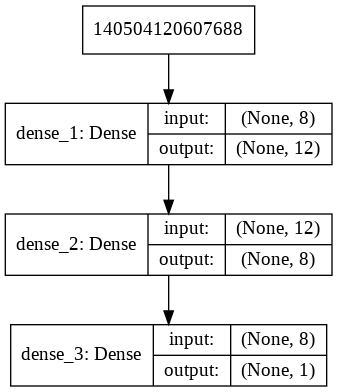

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')